In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import starlingrt

from starlingrt import sample, data, functions, visualize

def load_mass_hunter(input_directory):
    """
    Load MassHunter(TM) data from the input directory.

    The data is assumed to be laid out in a tree structure like this:

    input_directory/
        FOLDER_YYYY_MM_DD.D/
            MSRep.xls
        FOLDER_YYYY_MM_DD.D/
            MSRep.xls
        FOLDER_YYYY_MM_DD.D/
            MSRep.xls
        ...

    Parameters
    ----------
    input_directory : str
        Directory to seach for raw folders are in.

    Returns
    -------
    samples : list(sample.MassHunterSample)
        List of Samples collected from all directories in `input_directory`.
    """
    samples = []
    folders = sorted([f for f in os.listdir(input_directory) if os.path.isdir(os.path.join(input_directory, f))])
    for f in folders:
        fname = os.path.join(input_directory, os.path.join(f, "MSRep.xls"))
        if os.path.isfile(fname):
            try:
                samples.append(
                    starlingrt.sample.MassHunterSample(fname)
                )
            except Exception as e:
                raise Exception(f'Unable to read {fname} : {e}')
        else:
            raise Exception(f'Could not locate MSRep.xls file in {fname}')

    return samples

In [4]:
top_entries = starlingrt.data.Utilities.select_top_entries(
    starlingrt.data.Utilities.create_entries(
        load_mass_hunter(
            "../../../projects/completed/2023/2023-gcms-workflow/data/raw/sample_data/Med_2022_vhodni/"
        )
    )
)

In [11]:
import numpy as np
np.array([True, False]).all()

False

In [7]:
by_name = data.Utilities.group_entries_by_name(top_entries)

In [9]:
by_name['Carbon dioxide']

[(<Entry at 0x77c7d5b49f30>, '29b787d6d9720dda63584c0e33180c7a8ef95e2d'),
 (<Entry at 0x77c7bf0712a0>, '0ccd4b4b6f6f4b17c2ae2a8316fc01f5f8bd6b0b'),
 (<Entry at 0x77c7bef321a0>, '66cf43347a5ad9cd0281a047f641390f935003bf'),
 (<Entry at 0x77c7bef32560>, '87cd06b3be56fdecf525e417e1a55c04d283e60a'),
 (<Entry at 0x77c7bee87be0>, '34e5b0730f757277eb0cd3e762916cb20e4de972'),
 (<Entry at 0x77c7bed3e560>, '4864e7b2ddbb185d000f05c1f4a38c306da08145'),
 (<Entry at 0x77c7bedfe920>, 'f97cb8e1005518576051fa331f1d804c869acfaf'),
 (<Entry at 0x77c7beca3460>, '610a9ccaef553ddbe19e84850515fe65f56291ea'),
 (<Entry at 0x77c7beb5b820>, 'ea2c6e92d2e5050afb31fe31c6421414061d33ee'),
 (<Entry at 0x77c7bea02920>, 'b48655cadd96401394d0fcbbbf571f60b0545a30'),
 (<Entry at 0x77c7beada1a0>, '57e1614c69898ffc76f5fc2ef78e143568866a71'),
 (<Entry at 0x77c7be99da20>, '262912a7b3b3500db6efebc12d145d54698cd3e0'),
 (<Entry at 0x77c7be85ece0>, 'd80d715de648939949b4a0660f062ab4fe3536ef'),
 (<Entry at 0x77c7be7270a0>, 'a2d4a38a

In [5]:
top_entries

{'29b787d6d9720dda63584c0e33180c7a8ef95e2d': <Entry at 0x77c7d5b49f30>,
 '941ae05084e7775dae956d9bed8cf89696a24657': <Entry at 0x77c7bf2637f0>,
 'b39a90274392b0e67bb13ffc932f08625345aece': <Entry at 0x77c7bf263bb0>,
 '269c431ff80aaec9c5f6e9e8b5e31193bac2e73d': <Entry at 0x77c7bf263f70>,
 'cacc3de493db06b71204971414639003a3f0cf81': <Entry at 0x77c7bf274370>,
 '135dad988a3a7f901cd9f1655a5d512410d2294e': <Entry at 0x77c7bf274730>,
 '4471f5080ba2255b87845f4a4c423480cbc60ebd': <Entry at 0x77c7bf274af0>,
 'a1f547bcef8bb85130e7948696688ddbb8501db2': <Entry at 0x77c7bf274eb0>,
 'bc3e308393f7861b6bafa21c16d5c42f8c6a5e50': <Entry at 0x77c7bf275270>,
 '3277b149848b39b63f2d0939a6939e178237a047': <Entry at 0x77c7bf275630>,
 '4ca28f8d0b269a2a0c380ad61cbce8866b04cba5': <Entry at 0x77c7bf2759f0>,
 'e1a9fec76dff71722814e28976048e65dc3ad4d0': <Entry at 0x77c7bf275db0>,
 'b30f1a7c0b5d8f159c4b0225980c18f256d135e1': <Entry at 0x77c7bf276170>,
 '01a7ee84280930a6104f8074ba7dd65af94fd57f': <Entry at 0x77c7bf2

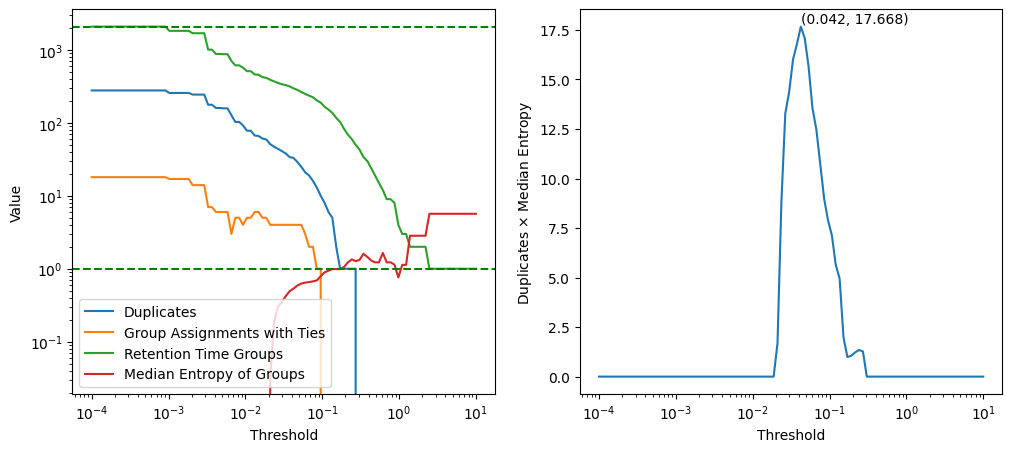

In [6]:
# 1. Estimate the threshold first
df, _, _ = starlingrt.functions.get_dataframe(top_entries)
threshold = starlingrt.functions.estimate_threshold(df, display=True)

In [6]:
# 2. Use this threshold to create groups and create interactive table.
threshold = starlingrt.functions.estimate_threshold(
    starlingrt.functions.get_dataframe(top_entries)[0], 
    display=False
)
print(f'Using a threshold of {threshold}')

Using a threshold of 0.04229242874389499


In [9]:
# 3. Create the interactive HTML file and open in a browser!
starlingrt.visualize.make(
    top_entries=top_entries, 
    width=1200,
    threshold=threshold,
    output_filename='summary.html',
)